In [3]:
import numpy as np
import pandas as pd
from ggplot import *
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

In [4]:
df = pd.read_csv("vehicles.csv")
df.head()

C:\Users\Steve\Anaconda2\envs\gl-env\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (22,23,70,71,72,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,youSaveSpend,guzzler,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,mfrCode
0,15.689436,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,-1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29.950562,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,-11500,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12.195570,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,1750,NaN,SIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29.950562,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,-11500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17.337486,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,-3500,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print "Number of observations:", len(df)
print "Number of variables:", len(df.columns)

Number of observations: 34287
Number of variables: 74


In [9]:
print "Number of unique years in dataset:", len(df.year.unique())
print "Earliest year in dataset:", df.year.min()
print "Most recent year in dataset:", df.year.max()

Number of unique years in dataset: 31
Earliest year in dataset: 1984
Most recent year in dataset: 2014


In [10]:
pd.value_counts(df.fuelType1)

Regular Gasoline     24587
Premium Gasoline      8521
Diesel                1025
Natural Gas             57
Electricity             56
Midgrade Gasoline       41
Name: fuelType1, dtype: int64

In [15]:
df["trany2"] = df.trany.apply(lambda x: str(x)[0])
pd.value_counts(df.trany2)

A    22451
M    11825
n       11
Name: trany2, dtype: int64

Group dataset by model year and look at some summary statistics.

In [16]:
group = df.groupby("year")
average = group["comb08", "highway08", "city08"].agg([np.mean])

In [19]:
average.columns = ["comb08_mean", "highway08_mean", "city08_mean"]
average["year"] = average.index

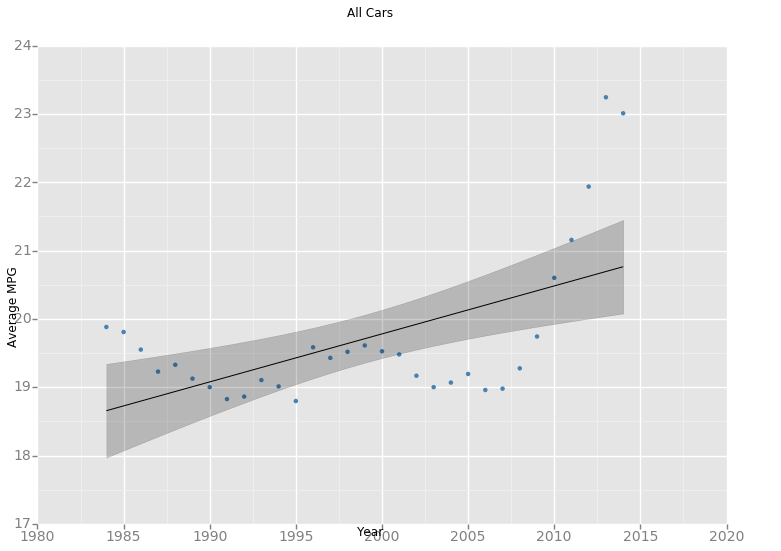

<ggplot: (39398085)>


In [25]:
print ggplot(average, aes("year", "comb08_mean")) + geom_point(color="steelblue") + xlab("Year") + \
ylab("Average MPG") + ggtitle("All Cars") + stat_smooth();

Repeat analysis from above but exclude hybrid and alternative fuel vehicles.

In [27]:
criteria1 = df.fuelType1.isin(["Regular Gasoline", "Premium Gasoline", "Midgrade Gasoline"])
criteria2 = df.fuelType2.isnull()
criteria3 = df.atvType != "Hybrid"
nonHydrid = df[criteria1 & criteria2 & criteria3]
print len(nonHydrid)

31661


In [28]:
group = nonHydrid.groupby(["year"])
average = group["comb08"].agg([np.mean])
average

,mean
year,
1984,19.121622
1985,19.394686
1986,19.320457
1987,19.164568
1988,19.367607
1989,19.141964
1990,19.031459
1991,18.838060
1992,18.861566


Clean up vehicle displacement data and plot average MPG vs. engine displacement.

In [29]:
criteria = nonHydrid.displ.notnull()
nonHydrid = nonHydrid[criteria]
nonHydrid.displ = nonHydrid.displ.astype("float")
nonHydrid = nonHydrid[nonHydrid.comb08.notnull()]
nonHydrid.comb08 = nonHydrid.comb08.astype("float")

C:\Users\Steve\Anaconda2\envs\gl-env\lib\site-packages\pandas\core\generic.py:2698: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


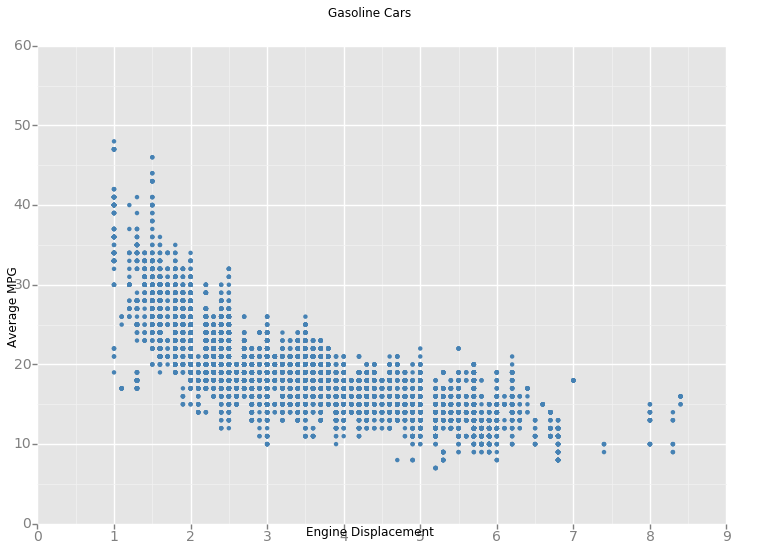

<ggplot: (39968432)>


In [31]:
print ggplot(nonHydrid, aes("displ", "comb08")) + geom_point(color="steelblue") + xlab("Engine Displacement") + \
    ylab("Average MPG") + ggtitle("Gasoline Cars");

In [32]:
groupYear = nonHydrid.groupby(["year"])
avgYear = groupYear["displ", "comb08"].agg([np.mean])

Transform data from wide to long format with year as id variable using Pandas melt functionality.

In [47]:
avgYear["year"] = avgYear.index
meltAvgYear = pd.melt(avgYear, id_vars="year")

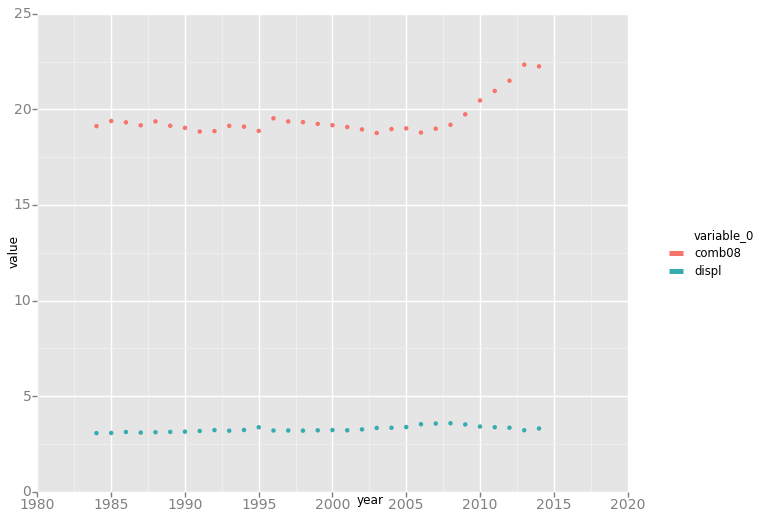

<ggplot: (40169006)>


In [107]:
p = ggplot(aes(x="year", y="value", color="variable_0"), data=meltAvgYear) 
print p + geom_point();

In [49]:
pd.unique(nonHydrid.cylinders)

array([4.0, 12.0, 8.0, 6.0, 5.0, 10.0, 2.0, 3.0, 16.0, '6', '8', '12', '4',
       '3', '5', '2', '10', '16', nan], dtype=object)

Convert cylinder data to float datatype and look at 4 cylinder engine vehicles.

In [51]:
nonHydrid.cylinders = nonHydrid.cylinders.astype("float")
pd.unique(nonHydrid.cylinders)
nonHydrid4 = nonHydrid[(nonHydrid.cylinders == 4.0)]

In [52]:
group4 = nonHydrid4.groupby(["year"]).make.nunique()

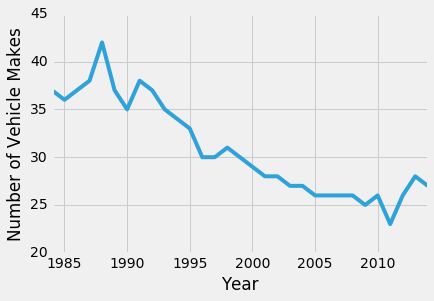

In [55]:
fig = group4.plot()
fig.set_xlabel("Year");
fig.set_ylabel("Number of Vehicle Makes");

Find manufacturers available every year of this dataset.

In [56]:
group4year = nonHydrid4.groupby(["year"])
uniqueMakes = []
for name, group in group4year:
    uniqueMakes.append(set(pd.unique(group["make"])))

In [57]:
uniqueMakes = reduce(set.intersection, uniqueMakes)
print uniqueMakes

set(['Dodge', 'Mitsubishi', 'Jeep', 'Chevrolet', 'Nissan', 'Honda', 'Toyota', 'Volkswagen', 'Mazda', 'Subaru', 'Chrysler', 'Ford'])


Investigate how different car manufacturers models have changed in terms of fuel efficiency.

In [61]:
commonMakes = nonHydrid4[nonHydrid4.make.isin(uniqueMakes)]
print len(commonMakes)

7272


In [62]:
cGroups = commonMakes.groupby(["year", "make"]).agg(np.mean).reset_index()

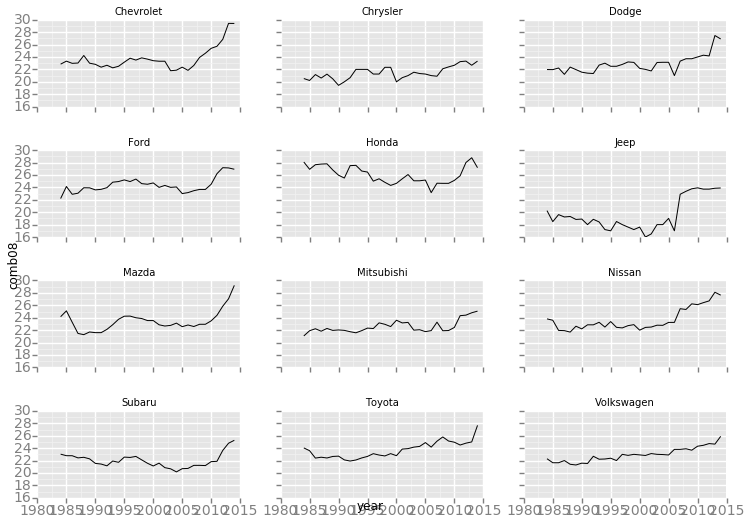

<ggplot: (40630767)>


In [65]:
print ggplot(cGroups, aes(x="year", y="comb08")) + geom_line() + facet_wrap("make");

Similar fuel efficiency time series for common manufacturers for 6 cylinder vehicles.

In [94]:
nonHydrid6 = nonHydrid[(nonHydrid.cylinders == 6.0) & (nonHydrid.make.isin(uniqueMakes))]
group6 = nonHydrid6.groupby(["year", "make"]).agg(np.mean).reset_index()

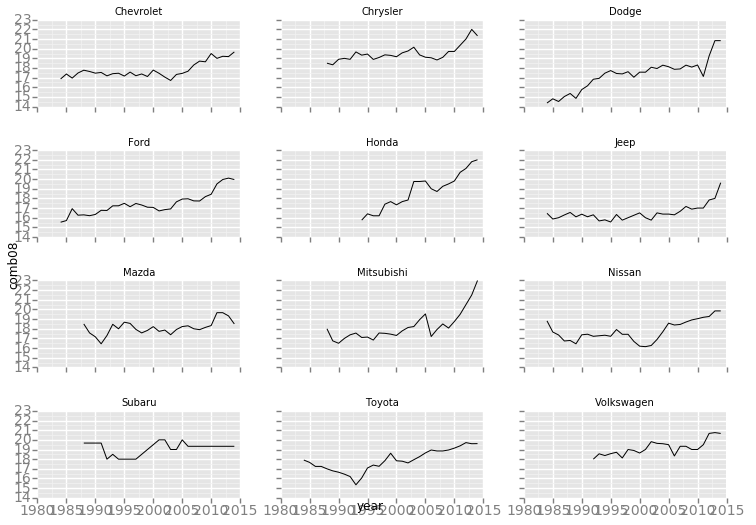

<ggplot: (39539748)>


In [77]:
print ggplot(group6, aes(x="year", y="comb08")) + geom_line() + facet_wrap("make");

In [98]:
groupYear = nonHydrid.groupby(["year"]).agg(np.mean)[["city08","highway08"]]
groupYear["year"] = groupYear.index
mpgMelt = pd.melt(groupYear, id_vars="year")
mpgMelt.head()

,year,variable,value
0,1984,city08,17.264982
1,1985,city08,17.482803
2,1986,city08,17.432836
3,1987,city08,17.223342
4,1988,city08,17.360328


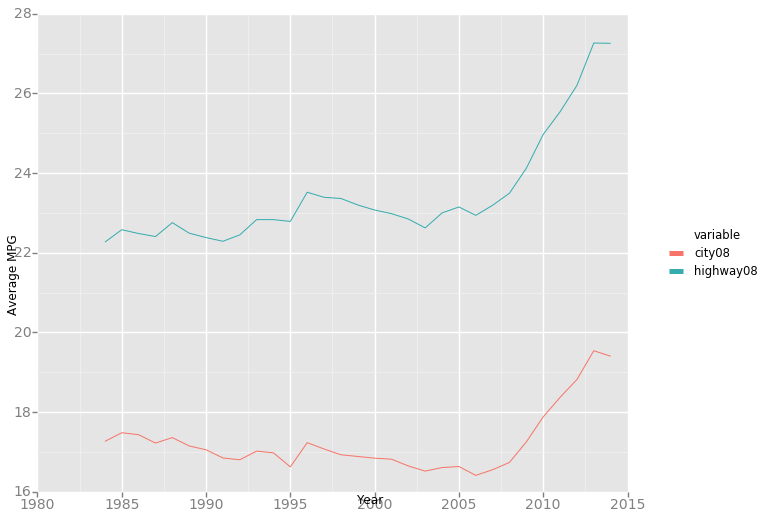

<ggplot: (41351894)>

In [106]:
p = ggplot(mpgMelt, aes(x="year", y="value", color="variable")) + geom_line() + xlab("Year") + \
    ylab("Average MPG");
p